# Apprentice Chef - Regression Model Development

> *by Jack Daoud, February 11th 2021*

# Setup

In [1]:
# Set up environment with libraries & data

##############################################################################
# Import libraries

import pandas as pd                     # data sceince essentials
import matplotlib.pyplot as plt         # essential graphical output
import seaborn as sns                   # enhanced visualizations
import numpy as np                      # mathematical essentials
from tqdm.notebook import tqdm          # progress bars
import time                             # time essentials

# Set Pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

##############################################################################
# Import data

# Specify file name
file_data = './_data/Apprentice_Chef_Dataset.xlsx'

# Read file into Python
chefs = pd.read_excel(io     = file_data,
                      header = 0)

##############################################################################
# Fix data

# Rename LARGEST_ORDER_SIZE to AVG_MEALS_ORDERED
chefs.rename(columns={'LARGEST_ORDER_SIZE':'AVG_MEALS_ORDERED'}, inplace=True)

# Print dimensions of data
print(f"""
Size of Original Dataset
------------------------
Observations: {chefs.shape[0]}
Features:     {chefs.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



# Variables & Description

#### Continuous
- `REVENUE`: Total revenue generated from each customer. Note that at times discounts are applied due to special circumstances, but this is extremely rare and not recorded in a separate column.
- `AVG_TIME_PER_SITE_VISIT`: Average time each customer spent per website or mobile app visit.
- `TOTAL_MEALS_ORDERED`: Total number of meals ordered by each customer. Customers can order several meals at one time.
- `AVG_PREP_VID_TIME`: Average time in seconds meal prep instruction video was was playing.
- `TOTAL_PHOTOS_VIEWED`: Total number of clicks on photos across all website or mobile app visits.

#### Interval/Count

- `UNIQUE_MEALS_PURCH`: Number of unique meal sets ordered by each customer.
- `CONTACTS_W_CUSTOMER_SERVICE`: Number of times each customer made contact with customer service. This number does not include rating meal sets or completing satisfaction surveys.
- `PRODUCT_CATEGORIES_VIEWED`: Total number of meal categories viewed (vegan, etc.).
- `CANCELLATIONS_BEFORE_NOON`: Number of meals canceled BEFORE 12:00 PM (noon) as per cancelation policy.
- `CANCELLATIONS_AFTER_NOON`: Number of meals canceled AFTER 12:00 PM (noon) as per cancelation policy.
- `MOBILE_LOGINS`: Total number of logins to the mobile platform.
- `PC_LOGINS`: Total number of logins to the website.
- `WEEKLY_PLAN`: Number of weeks customer subscribed to the weekly plan discount promotion.
- `EARLY_DELIVERIES`: Total meal deliveries that arrived early.
- `LATE_DELIVERIES`: Total meal deliveries that arrived late.
- `MASTER_CLASSES_ATTENDED`: Number of times each customer attended a master cooking class (1 class per quarter).
- `MEDIAN_MEAL_RATING`: Median rating of meal sets by each customer
- `AVG_MEALS_ORDERED`: Average number of meals ordered per customer.
- `AVG_CLICKS_PER_VISIT`: Average number of clicks per site or mobile app visit



#### Categorical
- `CROSS_SELL_SUCCESS`: Success of the cross-sell promotion (1 = yes, 0 = no).
- `MOBILE_NUMBER`: Indicates whether the registered phone number of a custmer is mobile or landline (1 = mobile, 0 = landline).
- `TASTES_AND_PREFERENCES`: Customer specified their tastes and preferences in their profile (optional).
- `PACKAGE_LOCKER`: Customer's residence/building has a package locker service or package room.
- `REFRIGERATED_LOCKER`: Package locker has refrigerated compartments.

#### Personal Identification Information (PII)
- `NAME`
- `EMAIL`
- `FIRST_NAME`
- `LAST_NAME`

# Exploration

## Response Variable

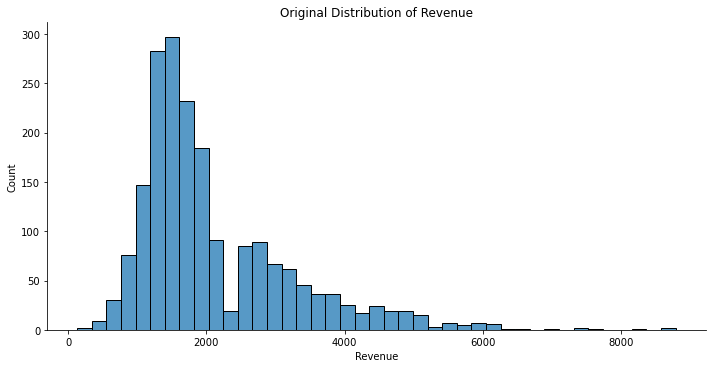

In [2]:
# Plot original distribution of Revenue

# Create histogram
sns.displot(data   = chefs,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)

# Label title & axis
plt.title(label   = 'Original Distribution of Revenue')
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Count')

# Display plot
plt.show()

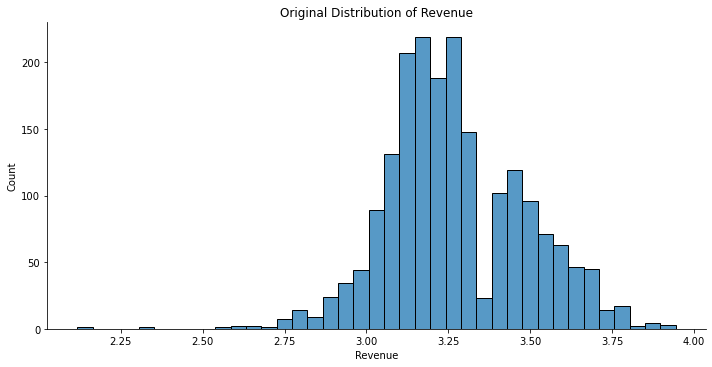

In [3]:
# Plot logarithmic distribution of Revenue

# log transforming REVENUE and saving it to the dataset
chefs['log_REVENUE'] = np.log10(chefs['REVENUE'])

# Plot original distribution of Revenue

# Create histogram
sns.displot(data   = chefs,
            x      = 'log_REVENUE',
            height = 5,
            aspect = 2)

# Label title & axis
plt.title(label   = 'Original Distribution of Revenue')
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Count')

# Display plot
plt.show()

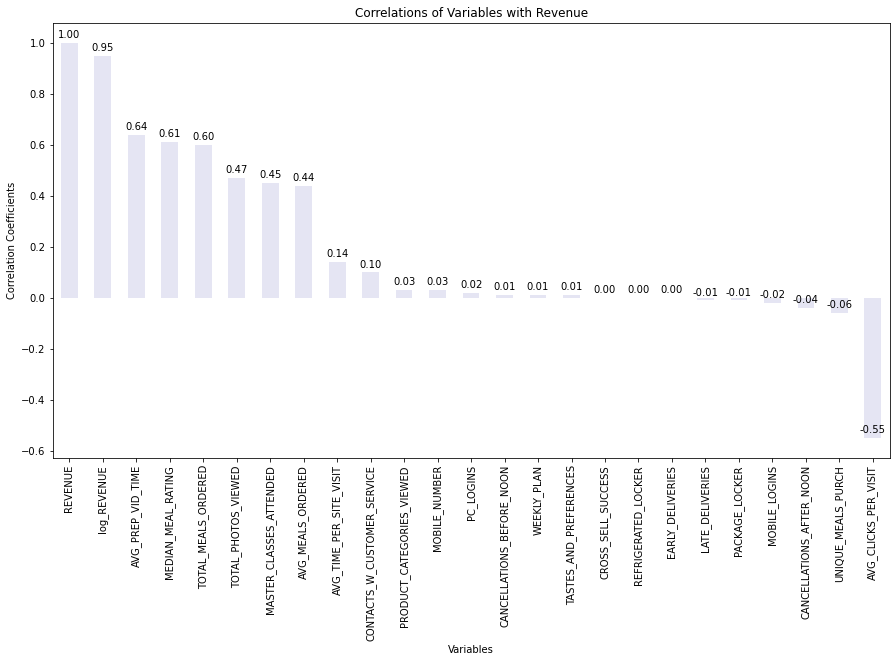

In [4]:
# Plot correlation coefficients of "REVENUE" with other variables:

plt.figure(figsize=(15,8))

ax = chefs.corr()['REVENUE'] \
          .sort_values(ascending = False)\
          .round(2)\
          .plot(kind = 'bar', color = 'darkblue', alpha = 0.1)

ax.set_title('Correlations of Variables with Revenue')
ax.set_xlabel('Variables')
ax.set_ylabel('Correlation Coefficients')

#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
    
# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')

<br><br>

## Explanatory Variables

### Continuous 

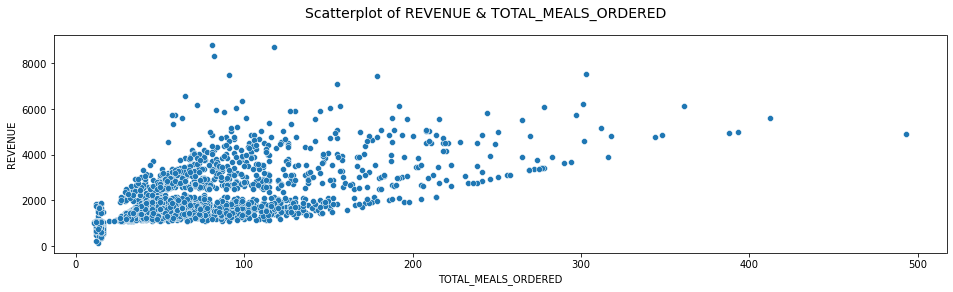

Descriptive Statistics: 
 count    1946.000000
mean       74.634121
std        55.309782
min        11.000000
25%        39.000000
50%        60.000000
75%        95.000000
max       493.000000
Name: TOTAL_MEALS_ORDERED, dtype: float64


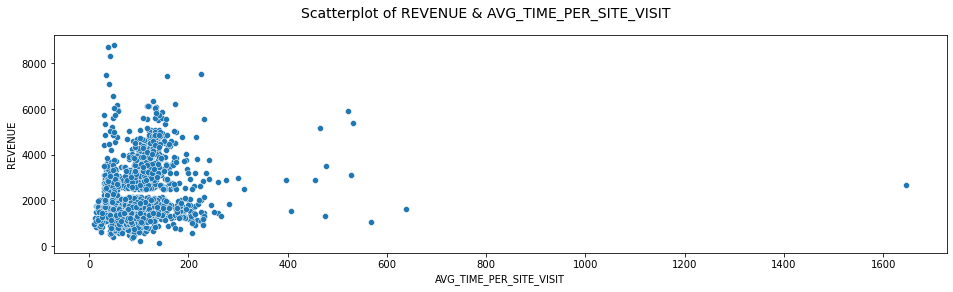

Descriptive Statistics: 
 count    1946.000000
mean       99.604651
std        62.341756
min        10.330000
25%        72.000000
50%        94.160000
75%       117.287500
max      1645.600000
Name: AVG_TIME_PER_SITE_VISIT, dtype: float64


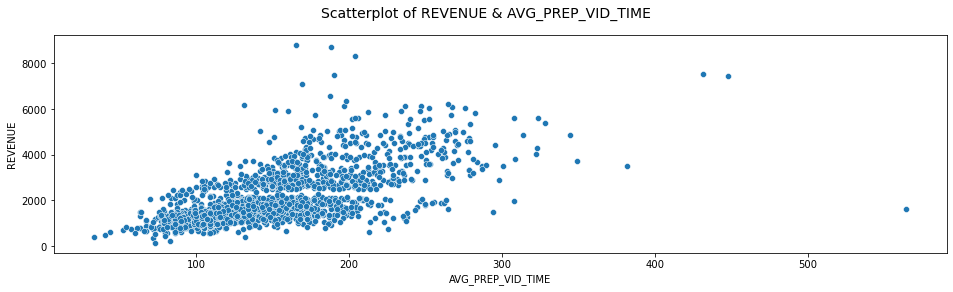

Descriptive Statistics: 
 count    1946.000000
mean      150.556578
std        49.447180
min        33.400000
25%       114.400000
50%       145.600000
75%       173.775000
max       564.200000
Name: AVG_PREP_VID_TIME, dtype: float64


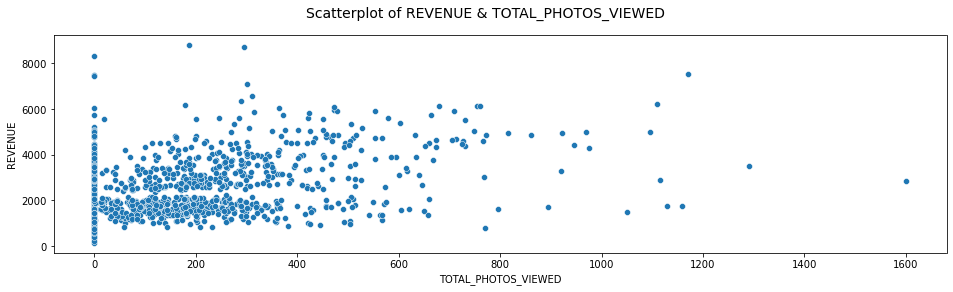

Descriptive Statistics: 
 count    1946.000000
mean      106.433710
std       181.014124
min         0.000000
25%         0.000000
50%         0.000000
75%       174.000000
max      1600.000000
Name: TOTAL_PHOTOS_VIEWED, dtype: float64


In [5]:
# Plot scatter plots for continuous variables

continuous_variables = ['AVG_TIME_PER_SITE_VISIT', 
                        'AVG_PREP_VID_TIME', 
                        'TOTAL_PHOTOS_VIEWED',
                        'TOTAL_MEALS_ORDERED']

# Define function to plot distributions of variables
def scatterplot(data, y_variable, x_variable):
    """
    Plot scatterplots of continuous variables against REVENUE
    """
    fig, ax = plt.subplots(1)
    fig.set_size_inches(16,4)
    fig.suptitle("Scatterplot of REVENUE & " + x_variable, fontsize=14)
    sns.scatterplot(data=data, x=x_variable, y=y_variable)
    plt.show()
    
    print("Descriptive Statistics: \n",
          data[x_variable].describe())
    
# Loop through each continuous variable in our data set and run the predefined function
for col in chefs.columns:
    if col in continuous_variables:
        scatterplot(data = chefs, y_variable = 'REVENUE', x_variable = col)

<br><br>

### Integer / Count

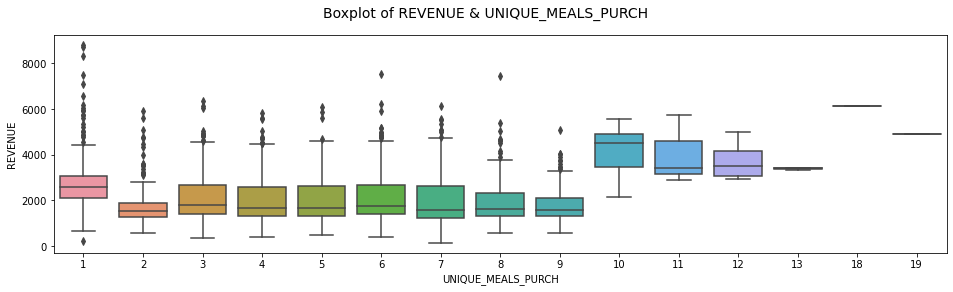

Descriptive Statistics: 

count    1946.000000
mean        4.904933
std         2.502175
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        19.000000
Name: UNIQUE_MEALS_PURCH, dtype: float64

Counts: 

1     173
2     170
3     338
4     260
5     214
6     226
7     205
8     179
9     162
10      7
11      3
12      4
13      3
18      1
19      1
Name: UNIQUE_MEALS_PURCH, dtype: int64
------------------------------------------------------------------------------------





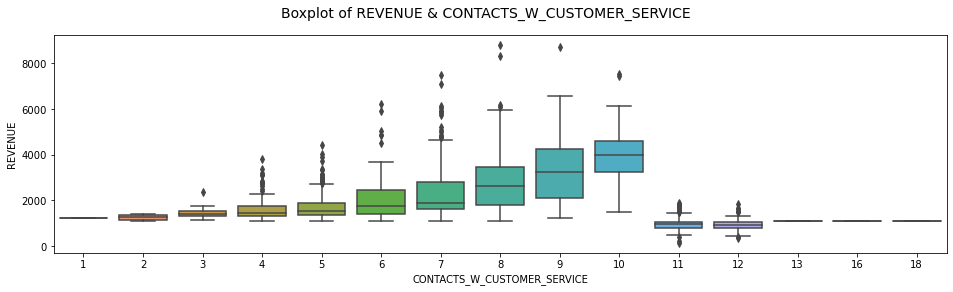

Descriptive Statistics: 

count    1946.000000
mean        6.983556
std         2.281193
min         1.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        18.000000
Name: CONTACTS_W_CUSTOMER_SERVICE, dtype: float64

Counts: 

1       1
2       8
3      53
4     180
5     292
6     356
7     378
8     256
9     138
10     68
11    121
12     92
13      1
16      1
18      1
Name: CONTACTS_W_CUSTOMER_SERVICE, dtype: int64
------------------------------------------------------------------------------------





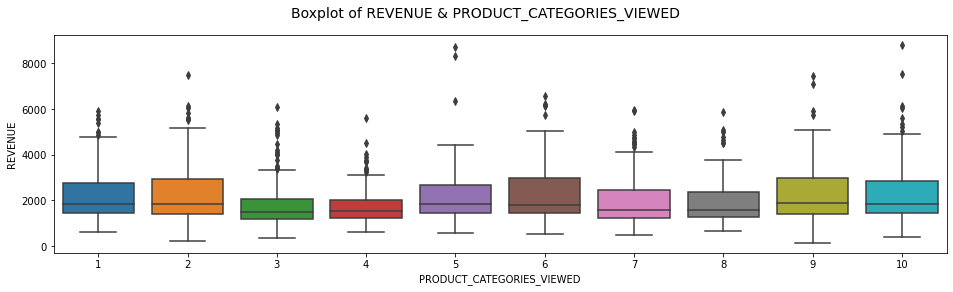

Descriptive Statistics: 

count    1946.000000
mean        5.383864
std         3.044001
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: PRODUCT_CATEGORIES_VIEWED, dtype: float64

Counts: 

1     162
2     313
3     253
4     146
5     156
6     153
7     170
8     166
9     140
10    287
Name: PRODUCT_CATEGORIES_VIEWED, dtype: int64
------------------------------------------------------------------------------------





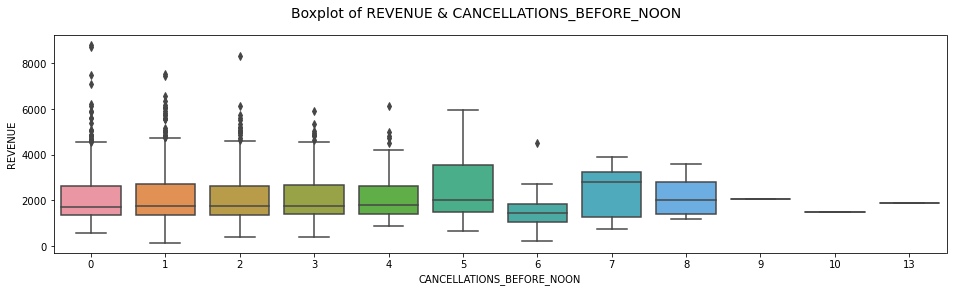

Descriptive Statistics: 

count    1946.000000
mean        1.404933
std         1.549677
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: CANCELLATIONS_BEFORE_NOON, dtype: float64

Counts: 

0     667
1     567
2     331
3     189
4     105
5      43
6      23
7      11
8       7
9       1
10      1
13      1
Name: CANCELLATIONS_BEFORE_NOON, dtype: int64
------------------------------------------------------------------------------------





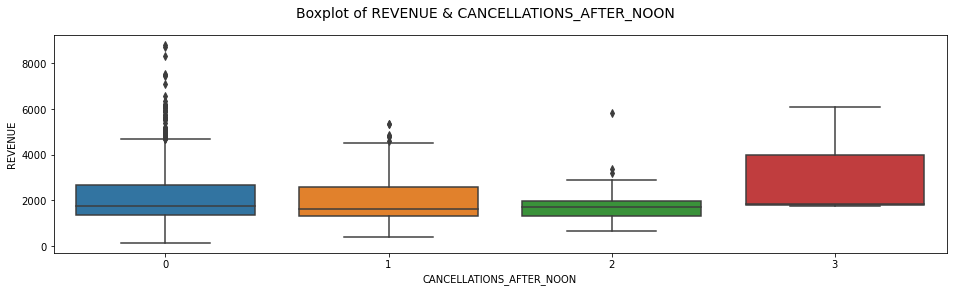

Descriptive Statistics: 

count    1946.000000
mean        0.165982
std         0.432241
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: CANCELLATIONS_AFTER_NOON, dtype: float64

Counts: 

0    1667
1     238
2      38
3       3
Name: CANCELLATIONS_AFTER_NOON, dtype: int64
------------------------------------------------------------------------------------





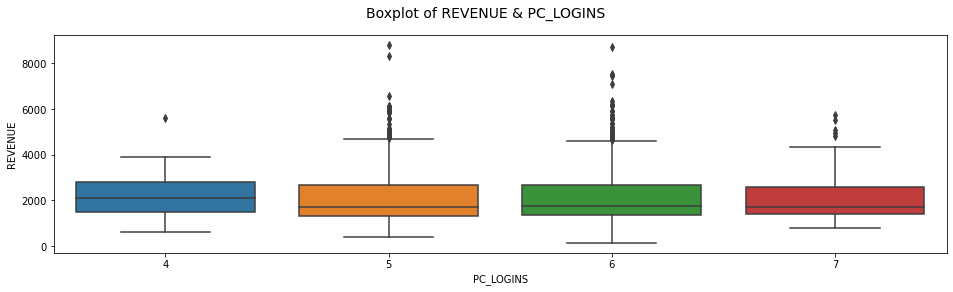

Descriptive Statistics: 

count    1946.000000
mean        5.515930
std         0.580757
min         4.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: PC_LOGINS, dtype: float64

Counts: 

4     41
5    904
6    957
7     44
Name: PC_LOGINS, dtype: int64
------------------------------------------------------------------------------------





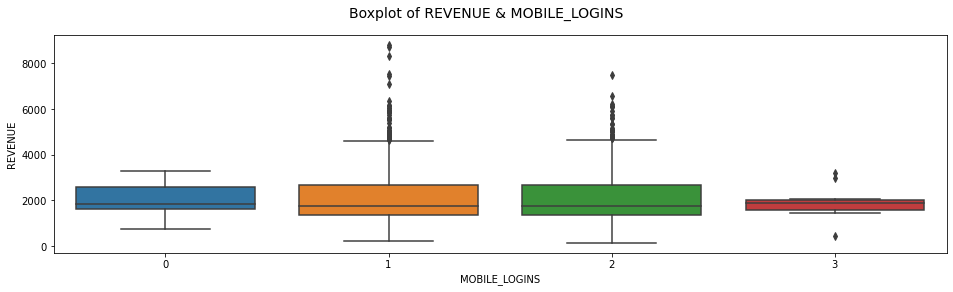

Descriptive Statistics: 

count    1946.000000
mean        1.476362
std         0.527600
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: MOBILE_LOGINS, dtype: float64

Counts: 

0     16
1    999
2    919
3     12
Name: MOBILE_LOGINS, dtype: int64
------------------------------------------------------------------------------------





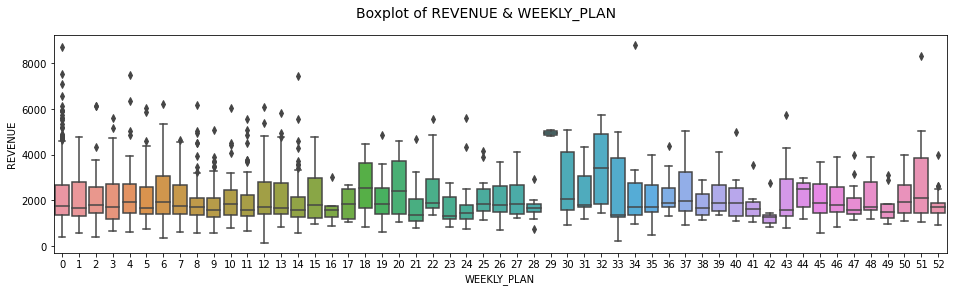

Descriptive Statistics: 

count    1946.000000
mean       11.329908
std        13.573303
min         0.000000
25%         1.000000
50%         7.000000
75%        13.000000
max        52.000000
Name: WEEKLY_PLAN, dtype: float64

Counts: 

0     468
1      78
2      82
3      75
4      71
5      66
6      73
7      75
8      93
9      73
10     55
11     78
12     85
13     88
14     82
15     14
16      5
17      6
18      7
19     12
20     10
21     13
22     19
23      8
24     15
25     11
26     11
27      6
28      8
29      2
30      9
31     11
32      8
33      5
34     10
35     16
36     13
37     18
38     10
39     10
40      9
41      7
42      9
43      9
44      7
45     13
46     14
47     16
48     13
49      9
50     13
51     11
52     17
Name: WEEKLY_PLAN, dtype: int64
------------------------------------------------------------------------------------





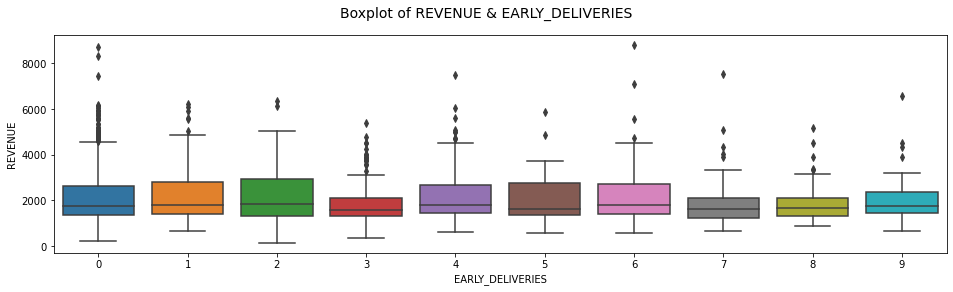

Descriptive Statistics: 

count    1946.000000
mean        1.486125
std         2.318599
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max         9.000000
Name: EARLY_DELIVERIES, dtype: float64

Counts: 

0    1167
1     139
2     128
3     153
4     157
5      37
6      43
7      43
8      45
9      34
Name: EARLY_DELIVERIES, dtype: int64
------------------------------------------------------------------------------------





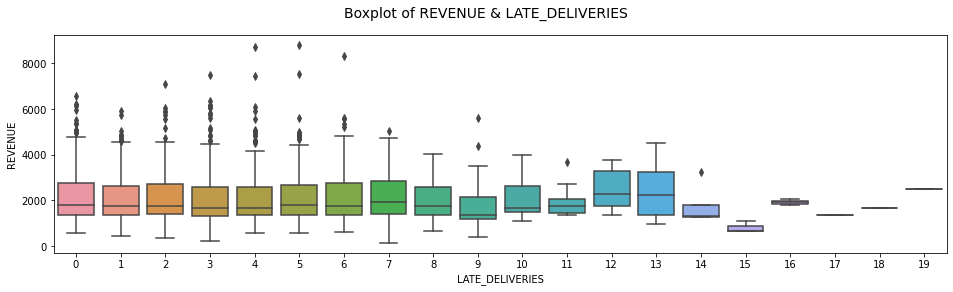

Descriptive Statistics: 

count    1946.000000
mean        2.970709
std         2.744598
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        19.000000
Name: LATE_DELIVERIES, dtype: float64

Counts: 

0     319
1     373
2     332
3     273
4     223
5     127
6      98
7      66
8      39
9      36
10     25
11      9
12      6
13      8
14      4
15      3
16      2
17      1
18      1
19      1
Name: LATE_DELIVERIES, dtype: int64
------------------------------------------------------------------------------------





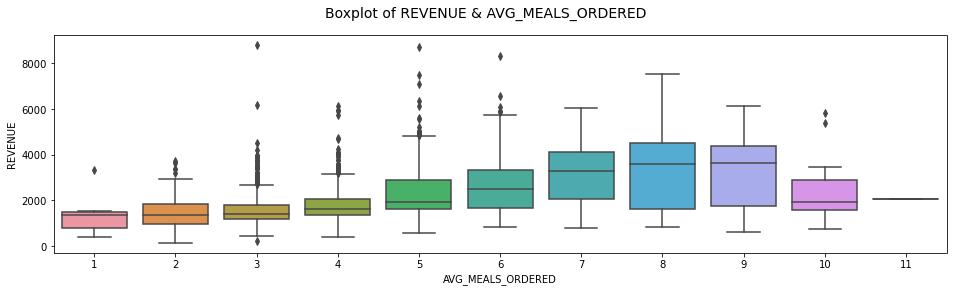

Descriptive Statistics: 

count    1946.000000
mean        4.437307
std         1.549666
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        11.000000
Name: AVG_MEALS_ORDERED, dtype: float64

Counts: 

1      17
2     135
3     391
4     547
5     449
6     236
7      89
8      49
9      20
10     12
11      1
Name: AVG_MEALS_ORDERED, dtype: int64
------------------------------------------------------------------------------------





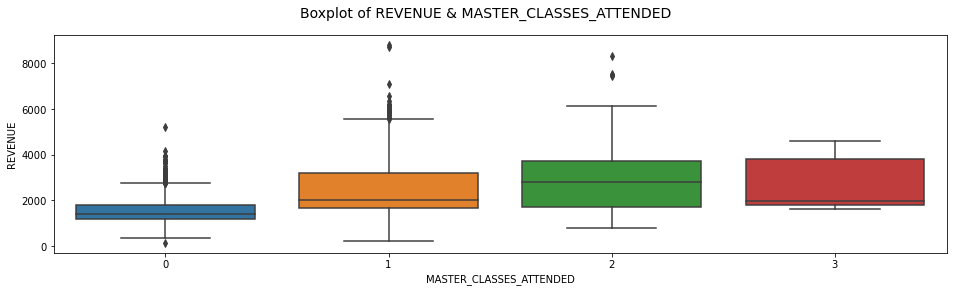

Descriptive Statistics: 

count    1946.000000
mean        0.604317
std         0.641866
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: MASTER_CLASSES_ATTENDED, dtype: float64

Counts: 

0    932
1    858
2    150
3      6
Name: MASTER_CLASSES_ATTENDED, dtype: int64
------------------------------------------------------------------------------------





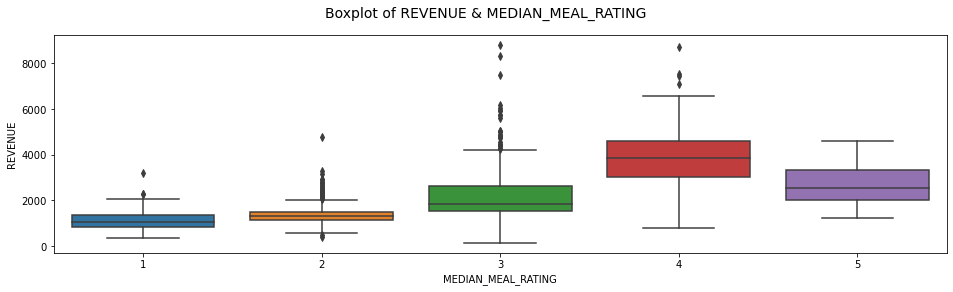

Descriptive Statistics: 

count    1946.000000
mean        2.794964
std         0.756528
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: MEDIAN_MEAL_RATING, dtype: float64

Counts: 

1      99
2     487
3    1087
4     260
5      13
Name: MEDIAN_MEAL_RATING, dtype: int64
------------------------------------------------------------------------------------





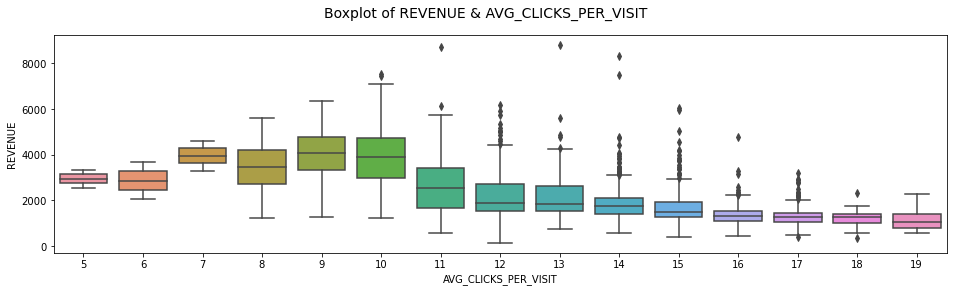

Descriptive Statistics: 

count    1946.000000
mean       13.508222
std         2.333876
min         5.000000
25%        12.000000
50%        13.000000
75%        15.000000
max        19.000000
Name: AVG_CLICKS_PER_VISIT, dtype: float64

Counts: 

5       2
6       2
7       2
8      27
9      64
10     92
11    175
12    267
13    358
14    312
15    250
16    169
17    148
18     64
19     14
Name: AVG_CLICKS_PER_VISIT, dtype: int64
------------------------------------------------------------------------------------





In [6]:
# Plot box plots for integer / count variables

count_variables = ['UNIQUE_MEALS_PURCH', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 
                   'PRODUCT_CATEGORIES_VIEWED',
                   'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON',
                   'MOBILE_LOGINS',
                   'PC_LOGINS',
                   'WEEKLY_PLAN',
                   'EARLY_DELIVERIES',
                   'LATE_DELIVERIES',
                   'MASTER_CLASSES_ATTENDED',
                   'MEDIAN_MEAL_RATING',
                   'AVG_MEALS_ORDERED',
                   'AVG_CLICKS_PER_VISIT']

# Define function to plot distributions of variables
def boxplot(data, y_variable, x_variable):
    """
    Plot boxplots of count/integer variables against REVENUE
    """
    fig, ax = plt.subplots(1)
    fig.set_size_inches(16,4)
    fig.suptitle("Boxplot of REVENUE & " + x_variable, fontsize=14)
    sns.boxplot(data=data, x=x_variable, y=y_variable)
    plt.show()
    
    print("Descriptive Statistics: \n",
          data[x_variable].describe(),
          "\nCounts: \n",
          data[x_variable].value_counts(normalize = False).sort_index(),
          "------------------------------------------------------------------------------------\n\n\n",
          sep = '\n')
    
# Loop through each continuous variable in our data set and run the predefined function
for col in chefs.columns:
    if col in count_variables:
        boxplot(data = chefs, y_variable = 'REVENUE', x_variable = col)

<br><br>

## Correlations

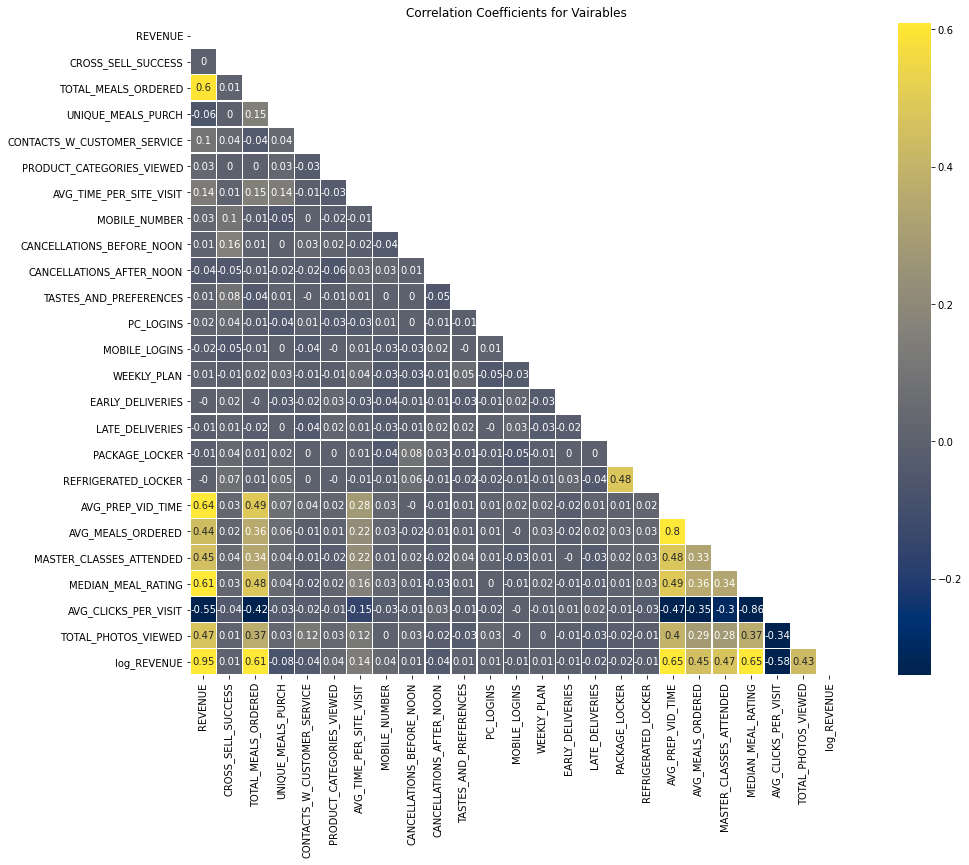

In [7]:
# Calculate and plot correlation coefficients

# Create correlation matrix
corr_df = chefs.corr(method = 'pearson').round(decimals = 2)

# Set figure size
fig, ax = plt.subplots(figsize=(20,12))

# Plot lower triangle and remove diagonal
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True    

# Develop heatmap plot
sns.heatmap(data       = corr_df, # the correlation matrix
            cmap       = 'cividis',     
            robust     = True,
            square     = True,          
            annot      = True,                 
            linewidths = 0.25,
            mask       = mask, 
            annot_kws={"fontsize":10})


# Title & display plot
ax.set_title("Correlation Coefficients for Vairables")
plt.show()

# Feature Engineering

In [8]:
# 5 Flag-based Features

# Basic Rule:
# At least 100 observations must be on both sides of the flag (1s and 0s)

# Calculate number of observations with 0s per variable
photos             = sum(chefs['TOTAL_PHOTOS_VIEWED'][:] == 0)       # TOTAL_PHOTOS_VIEWED
early_deliveries   = sum(chefs['EARLY_DELIVERIES'][:] == 0)          # EARLY_DELIVERIES
late_deliveries    = sum(chefs['LATE_DELIVERIES'][:] == 0)           # LATE_DELIVERIES
early_cancellation = sum(chefs['CANCELLATIONS_BEFORE_NOON'][:] == 0) # CANCELLATIONS_BEFORE_NOON
late_cancellation  = sum(chefs['CANCELLATIONS_AFTER_NOON'][:] == 0)  # CANCELLATIONS_AFTER_NOON
subscribers        = sum(chefs['WEEKLY_PLAN'][:] == 0)               # WEEKLY_PLAN


# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Viewd Photos   | {photos}\t\t{len(chefs) - photos}
Early Delivery | {early_deliveries}\t\t{len(chefs) - early_deliveries}
Late Delivery  | {late_deliveries}\t\t{len(chefs) - late_deliveries}
Early Cancel   | {early_cancellation}\t\t{len(chefs) - early_cancellation}
Late Cancel    | {late_cancellation}\t\t{len(chefs) - late_cancellation}
Subscribers    | {subscribers}\t\t{len(chefs) - subscribers}
""")

##############################################################################
# Engineer Features

# dummy variables
chefs['VIEWED_PHOTOS']      = 0
chefs['EARLY_DELIVERY']     = 0
chefs['LATE_DELIVERY']      = 0
chefs['EARLY_CANCELLATION'] = 0
chefs['LATE_CANCELLATION']  = 0
chefs['SUBSCRIBER']         = 0

for index, value in chefs.iterrows():

    # TOTAL_PHOTOS_VIEWED
    if chefs.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chefs.loc[index, 'VIEWED_PHOTOS'] = 1
        
        
    # EARLY_DELIVERIES
    if chefs.loc[index, 'EARLY_DELIVERIES'] > 0:
        chefs.loc[index, 'EARLY_DELIVERY'] = 1
        
        
    # LATE_DELIVERIES
    if chefs.loc[index, 'LATE_DELIVERIES'] > 0:
        chefs.loc[index, 'LATE_DELIVERY'] = 1
        
        
    # EARLY_CANCELLATION
    if chefs.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chefs.loc[index, 'EARLY_CANCELLATION'] = 1
       
    
    # LATE_CANCELLATION
    if chefs.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chefs.loc[index, 'LATE_CANCELLATION'] = 1

        
    # WEEKLY_PLAN
    if chefs.loc[index, 'WEEKLY_PLAN'] > 0:
        chefs.loc[index, 'SUBSCRIBER'] = 1




                 No		Yes
               ---------------------
Viewd Photos   | 1140		806
Early Delivery | 1167		779
Late Delivery  | 319		1627
Early Cancel   | 667		1279
Late Cancel    | 1667		279
Subscribers    | 468		1478



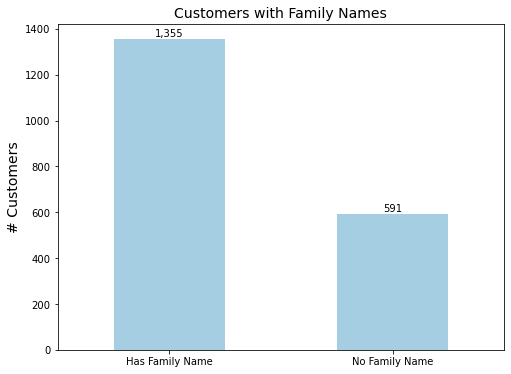

In [9]:
# LAST_NAME Binary Variable

"""
This is is a YES/NO variable for customers with a legitimate FAMILY_NAME.
Where legitimate means non-identical to the customer's FIRST_NAME.

- A small portion of users didn't input a family name.
- Another portion inputted their family name identical to their first name.

We will group aforementioned portions into customers with NO LAST_NAME.

This variable assumes that FIRST_NAME and FAMILY_NAME shouldn't be identical.
Some may argue that some people have identical FIRST_NAME and FAMILY_NAME,
however, this is a rare occurance. 

This is based on the reasoning that people who only input first name in a lead
generation form might not be serious and not intend to buy anything (Chase, 2021).
"""

# Count the number of times a space appears in a customers NAME
chefs['LAST_NAME'] = chefs['NAME'].str.count(' ')

# looping to group observations by domain type
chefs.loc[chefs['LAST_NAME'] > 1, 'LAST_NAME'] = 1

##############################################################################
        
# Plot Number of Customers with missing family names

# Count number of churn per month
last_names = chefs['LAST_NAME'].value_counts()

# Create plot
ax = last_names.plot(kind='bar', 
                      legend = True,
                      figsize = (8,6),
                      rot = 0,
                      colormap = "Paired")


# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 6),
                textcoords='offset points')

# Set plot aesthetics
ax.set_ylabel('# Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Customers with Family Names', size = 14)
ax.set_xticklabels(labels = ['Has Family Name', 'No Family Name'])
ax.legend().remove()

# Display plot
plt.show()

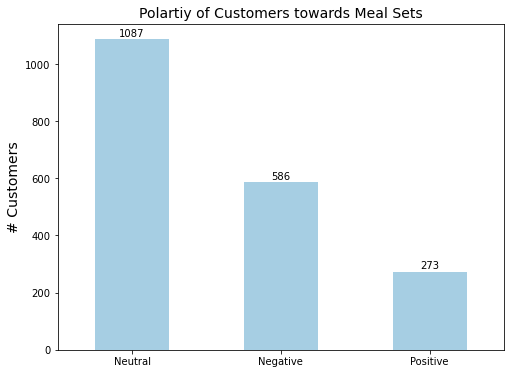

In [10]:
# MEAL_POLARITY Variable

"""
This is a categorical variable that classifies customer polarity based off
their MEDIAN_MEAL_RATING. 
- If the rating is greater than 3 (midpoint), then customer polarity is positive
- If the rating is less than 3, then customer polarity is negative
- If the rating equals 3, then customer polarity neutral

Positive = 1
Neutral  = 0
Negative = -1
"""

# Loop through each customer
for index, column in chefs.iterrows():
    
    # Check if the customer has a positive experience on average
    if chefs.loc[ index , 'MEDIAN_MEAL_RATING'] > 3:
        chefs.loc[ index , 'MEAL_POLARITY'] = 1
    elif chefs.loc[ index , 'MEDIAN_MEAL_RATING'] < 3:
        chefs.loc[ index , 'MEAL_POLARITY'] = -1
    else:
        chefs.loc[ index , 'MEAL_POLARITY'] = 0
        
        
# Change data type to integer
chefs.MEAL_POLARITY = chefs.MEAL_POLARITY.astype(int)

##############################################################################
# Plot Polarity by Customers

# Count number of churn per month
domains = chefs['MEAL_POLARITY'].value_counts()

# Create plot
ax = domains.plot(kind='bar', 
                  legend = True,
                  figsize = (8,6),
                  rot = 0,
                  colormap = "Paired")


# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 6),
                textcoords='offset points')

# Set plot aesthetics
ax.set_ylabel('# Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Polartiy of Customers towards Meal Sets', size = 14)
ax.set_xticklabels(labels = ['Neutral', 'Negative', 'Positive'])
ax.legend().remove()
 
# Display plot
plt.show()

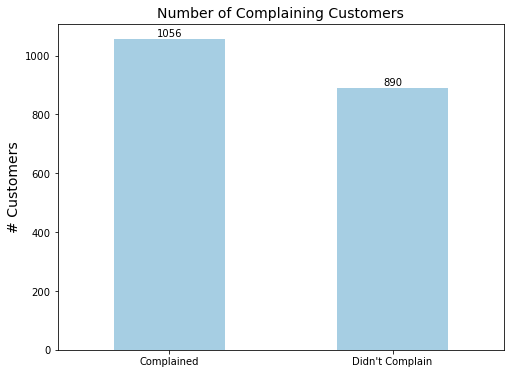

In [11]:
# COMPLAINED Variable

"""
This is a categorical variable that classifies whether or not a customer has
complained.

The customer team claims that the vast majority of cases are complaints.
Therefore, a reasonible demarcation of whether or not a customer 
complained would be:

If the number contacts a customer has with customer service is higher than
the average (7 contacts), then that customer is assumed to have complained.
"""

# Create complained variable and set it to 0
chefs['COMPLAINED'] = 0

# Calculate average of contacts with customer_service
AVG_CONTACTS_W_CUSTOMER_SERVICE = chefs['CONTACTS_W_CUSTOMER_SERVICE'].mean()

# Loop through each customer
for index, column in chefs.iterrows():
    
    # Check if the customer has a positive experience on average
    if chefs.loc[ index , 'CONTACTS_W_CUSTOMER_SERVICE'] > AVG_CONTACTS_W_CUSTOMER_SERVICE:
        chefs.loc[ index , 'COMPLAINED'] = 1
        
##############################################################################       
# Plot Number of Complaining Customers

# Count number of churn per month
domains = chefs['COMPLAINED'].value_counts()

# Create plot
ax = domains.plot(kind='bar', 
                  legend = True,
                  figsize = (8,6),
                  rot = 0,
                  colormap = "Paired")


# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 6),
                textcoords='offset points')

# Set plot aesthetics
ax.set_ylabel('# Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Number of Complaining Customers', size = 14)
ax.set_xticklabels(labels = ['Complained', "Didn't Complain"])
ax.legend().remove()
 
# Display plot
plt.show()

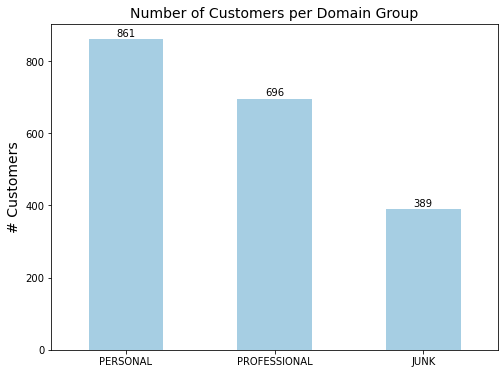

In [12]:
# DOMAIN_GROUP Categorical Variable

"""
This is a categorical variable that classifies email domains based on the 
info provided by the marketing team.
"""

# Loop through each customer
for index, col in chefs.iterrows():
    
        # Check if the customer is personal
        if '@gmail.com' in chefs.loc[index, 'EMAIL'] \
        or '@yahoo.com' in chefs.loc[index, 'EMAIL'] \
        or '@protonmail.com' in chefs.loc[index, 'EMAIL']:
            chefs.loc[index, 'DOMAIN_GROUP'] = 'PERSONAL'
        elif '@me.com' in chefs.loc[index, 'EMAIL'] \
        or '@aol.com' in chefs.loc[index, 'EMAIL'] \
        or '@hotmail.com' in chefs.loc[index, 'EMAIL'] \
        or '@live.com' in chefs.loc[index, 'EMAIL'] \
        or '@msn.com' in chefs.loc[index, 'EMAIL'] \
        or '@passport.com' in chefs.loc[index, 'EMAIL']:
            chefs.loc[index, 'DOMAIN_GROUP'] = 'JUNK'
        else:
            chefs.loc[index, 'DOMAIN_GROUP'] = 'PROFESSIONAL'

##############################################################################
# Plot Number of Customers per Domain Group

# Count number of churn per month
domains = chefs['DOMAIN_GROUP'].value_counts()

# Create plot
ax = domains.plot(kind='bar', 
                  legend = True,
                  figsize = (8,6),
                  rot = 0, 
                  colormap = "Paired")


# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 6),
                textcoords='offset points')

# Set plot aesthetics
ax.set_ylabel('# Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Number of Customers per Domain Group', size = 14)
ax.legend().remove()

# Display plot
plt.show()

In [13]:
# GENDER Variable from GUESSER

##############################################################################
# Import gender guesser
#import gender_guesser.detector as gender

# placeholder list
#placeholder_lst = []


# Loop to guess gender (with progress bar)
#for name in tqdm(chefs['FIRST_NAME']):
#    time.sleep(0.01)
#    guess = gender.Detector().get_gender(name)
#    placeholder_lst.append(guess)


# Convert list into a series and add to DataFrame
#chefs['GENDER_GUESS'] = pd.Series(placeholder_lst)


# Group categories
#chefs.loc[chefs['GENDER_GUESS'] == 'mostly_male', 'GENDER_GUESS'] = 'male'
#chefs.loc[chefs['GENDER_GUESS'] == 'mostly_female', 'GENDER_GUESS'] = 'female'


# Export genders
# Save feature rich data set to excel
#chefs.to_excel('./_data/chefs_feature_rich.xlsx',
#                 index = True)

##############################################################################
# Import genders

# Read file into Python
#chefs = pd.read_excel(io     = './_data/chefs_feature_rich.xlsx',
#                      header = 0)

##############################################################################       
# Plot Gender of Customers

# Count number of churn per month
#genders = chefs['GENDER_GUESS'].value_counts()

# Create plot
#ax = genders.plot(kind='bar', 
#                  legend = True,
#                  figsize = (8,6),
#                  rot = 0,
#                  colormap = "Paired")


# Annotate plot with values
#for p in ax.patches:
#    ax.annotate(format(p.get_height(), '.0f'),
#                (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center',
#                va='center',
#                xytext=(0, 6),
#                textcoords='offset points')

# Set plot aesthetics
#ax.set_ylabel('# Customers',size = 14)
#ax.set_xlabel('')
#ax.set_title('Number of Complaining Customers', size = 14)
#ax.set_xticklabels(labels = ['Complained', "Didn't Complain"])
#ax.legend().remove()
 
# Display plot
#plt.show()

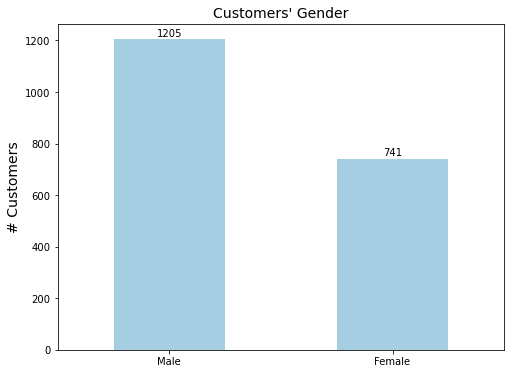

In [14]:
# GENDER Variable from GoT

"""
1 denotes Male
0 denotes Female
"""


# Import Game of Thrones character data
genders = pd.read_csv('./_data/game_of_thrones_characters.csv')

# Select only name & gender columns
genders = genders[['name', 'male']]

# Rename columns to match Chefs DataFrame
genders.columns = ['NAME', 'GENDER']

# Merge Gender column to Chefs DataFrame based on NAMES
chefs = pd.merge(chefs,  
                 genders,  
                 on ='NAME',  
                 how ='left') 

##############################################################################
# Plot Gender of Customers

# Count number of churn per month
genders = chefs['GENDER'].value_counts()

# Create plot
ax = genders.plot(kind='bar', 
                  legend = True,
                  figsize = (8,6),
                  rot = 0,
                  colormap = "Paired")


# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 6),
                textcoords='offset points')

# Set plot aesthetics
ax.set_ylabel('# Customers',size = 14)
ax.set_xlabel('')
ax.set_title("Customers' Gender", size = 14)
ax.set_xticklabels(labels = ['Male', "Female"])
ax.legend().remove()
 
# Display plot
plt.show()

In [15]:
# Convert Categorical Variables into Dummy Variables

# Drop PII variables
chefs.drop(labels  = ['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'],
           axis    = 1,
           inplace = True)

# Get Dummies 
chefs = pd.get_dummies(chefs)

# Drop DOMAIN_GROUP_JUNK
chefs.drop('DOMAIN_GROUP_JUNK', axis = 1, inplace = True)

In [16]:
# Outlier-based Features

# Define function to flag outliers
def flag_outliers(data, variable):
    """

    DESCRIPTION


    """
    # Create placeholder for outlier flag
    data['out_'+variable] = 0
    
    # Set upper and lower thresholds
    lower_threshold = pd.DataFrame(data.quantile(.25, axis = 0))
    upper_threshold = pd.DataFrame(data.quantile(.75, axis = 0))
    
    # Rename columns for indexing
    lower_threshold.columns = ['LOWER']
    upper_threshold.columns = ['UPPER']
    
    # Loop over each column to change its respective flag
    for index, column in data.iterrows():
        
        # Set conditional for variable & upper threshold
        if data.loc[index, variable] > upper_threshold.loc[variable, 'UPPER']:
            
            # Change outlier flag
            data.loc[index, 'out_'+variable] = 1
            
        # Set conditional for variable & lower threshold
        if data.loc[index, variable] < lower_threshold.loc[variable, 'LOWER']:
        
            # Change outlier flag
            data.loc[index, 'out_'+variable] = 1
    
    # Check for any variables with no outliers & delete them
    if data['out_'+variable].sum() == 0:
        del data['out_'+variable]
       
    
original_variables = ['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 
                      'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                      'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 
                      'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
                      'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 
                      'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 
                      'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 
                      'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 
                      'AVG_MEALS_ORDERED', 'MASTER_CLASSES_ATTENDED', 
                      'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
                      'TOTAL_PHOTOS_VIEWED']

# Run function to flag outliers for original variables
for col in chefs.columns:
    if col in original_variables:
        flag_outliers(chefs, col)

<br><br>

# Modeling

## K-Means

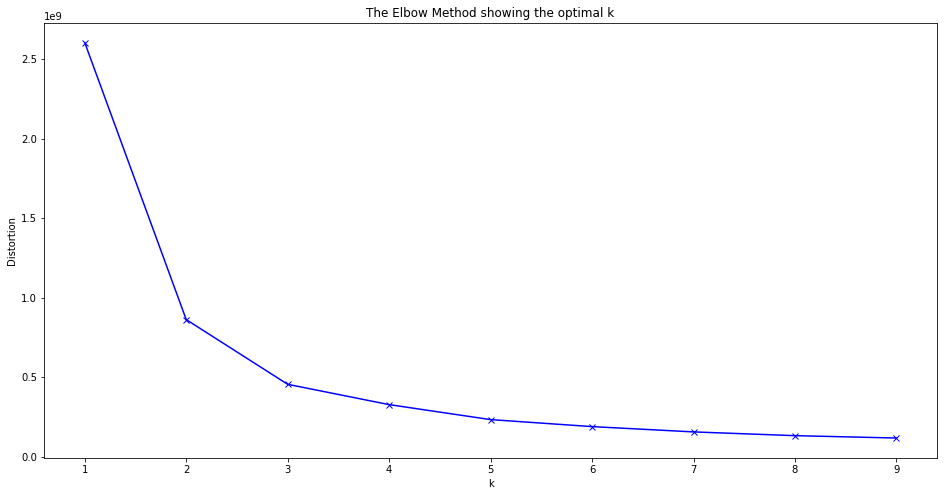

In [17]:
# K-Means Cluster Variable
from sklearn.cluster import KMeans                 # Customer segmentation

# Subset for explanatory variables for customer segmentation
X = chefs.loc[:, chefs.columns != 'log_REVENUE'].values

# Instantiate number of clusters
clusterNum = 3

# Instantiate KMEANS model
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)

# Fit the model
k_means.fit(X)

# Grab each label (segmentation) for each customer
k_means_labels = k_means.labels_

# Add cluster labels to data set
chefs["KMEANS_CLUSTERS"] = k_means_labels

# Display cluster average per variable
#chefs.groupby('KMEANS_CLUSTERS').mean()

##############################################################################
# Plot elbow point for optimal K

# Placeholder
distortions = []

# Number of Ks
K = range(1,10)

# Loop through each K
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)                            # Fit with X
    distortions.append(kmeanModel.inertia_)      # Append inertia to distortions
    
# "Inertia can be recognized as a measure of how internally coherent clusters are."
# https://scikit-learn.org/stable/modules/clustering.html

# Plot elbow point
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Source:
# https://predictivehacks.com/k-means-elbow-method-code-for-python/

## Regression

In [18]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Instantiate independant variables and dependant variable
X = chefs.loc[:, chefs.columns[~chefs.columns.isin(['REVENUE', 
                                                    'log_REVENUE'])]]
y = chefs.loc[:, 'log_REVENUE']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 219)


# Instantiate linear regression class
linear_regressor = LinearRegression()

# Fit the model
linear_regressor.fit(X_train, y_train)

# Print coefficients
coeff = pd.DataFrame(linear_regressor.coef_, X.columns, columns=['Coefficient'])


pred_y = linear_regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})

#print(coeff)
#print(df)

print('Accuracy:', linear_regressor.score(X, y))
print('\nMAE:', metrics.mean_absolute_error(y_test, pred_y))
print('MSE:', metrics.mean_squared_error(y_test, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

Accuracy: 0.8837243687090431

MAE: 0.05667100461747986
MSE: 0.006017946546137697
RMSE: 0.07757542488531853


In [19]:
# saving scoring data for future use
linear_train_score = linear_regressor.score(X_train, y_train).round(4) # using R-square
linear_test_score  = linear_regressor.score(X_test, y_test).round(4)   # using R-square
linear_test_gap    = abs(linear_train_score - linear_test_score).round(4)

# displaying and saving the gap between training and testing
print('Linear Train-Test Gap :', linear_test_gap)


Linear Train-Test Gap : 0.0127


In [20]:
# Print model summary
from regressors import stats

# Print summary table:
print("\n=========== SUMMARY ===========")
xlabels = chefs.columns[~chefs.columns.isin(['REVENUE', 
                                             'log_REVENUE'])]
stats.summary(linear_regressor, X, y, xlabels)

# Code from
# https://stackoverflow.com/questions/44495667/calculate-p-value-in-sklearn-using-python


=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
-0.2298 -0.0416 -0.0023  0.0412  0.8019


Coefficients:
                                 Estimate                   Std. Error               t value   p value
_intercept                       3.149821  105872.563717+18078.974632j    0.000000-0.000000j  0.999977
CROSS_SELL_SUCCESS              -0.007325           0.021797-0.000066j   -0.336100-0.001000j  0.736857
TOTAL_MEALS_ORDERED              0.000506           0.000110+0.000082j    2.966100-2.210000j  0.000223
UNIQUE_MEALS_PURCH              -0.005070          -0.011379+0.023539j    0.084400+0.174600j  0.846247
CONTACTS_W_CUSTOMER_SERVICE     -0.013654           0.000434+0.001372j   -2.862100+9.048600j  0.000000
PRODUCT_CATEGORIES_VIEWED        0.000904           0.005706-0.010657j    0.035300+0.065900j  0.940400
AVG_TIME_PER_SITE_VISIT         -0.000059           0.000026+0.000354j   -0.012300+0.166200j  0.867697
MOBILE_NUMBER                    0.0